In [1]:
print(1)

1


In [2]:
import pandas as pd

# Charger le fichier CSV
df = pd.read_csv('Synthetic_Financial_datasets_log.csv')

# Afficher les 10 premières lignes
df.head(10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
%pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install numpy
%pip install seaborn
%pip install scikit-learn 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
# importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

In [14]:
# Dimenstion du DataFrame 
df.shape

(6362620, 11)

In [15]:
# Information 
df.info

<bound method DataFrame.info of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1

In [16]:
#Informations statistiques 
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [17]:
#Vérification des valeurs manquantes dans le DataFrame
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [18]:
# Pour chaque colonne, on va compter combien de fois chaque valeur apparaît
for col in df.columns:
    print(f"Unique values for column {col}")
    print(df[col].value_counts())
    print("======================================================")

Unique values for column step
step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64
Unique values for column type
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
Unique values for column amount
amount
10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
8513.48           1
189137.90         1
1615.78           1
128891.19         1
12257.89          1
Name: count, Length: 5316900, dtype: int64
Unique values for column nameOrig
nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64
Unique values for column oldbalanceOrg
oldbalan

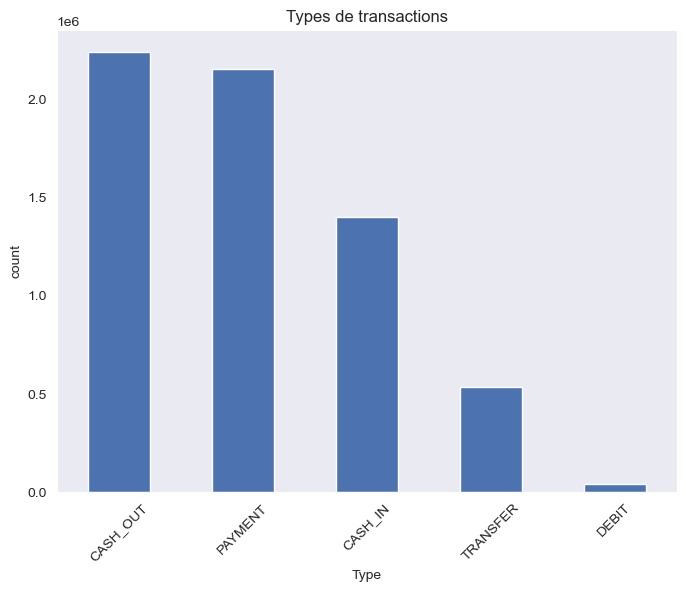

In [19]:
#Types de transactions
sns.set_style("dark")  
sns.set_palette("deep")  
plt.figure(figsize=(8, 6))
df['type'].value_counts().plot(kind='bar')
plt.title('Types de transactions')
plt.xticks(rotation = 45)
plt.xlabel('Type')
plt.ylabel('count')
plt.show()


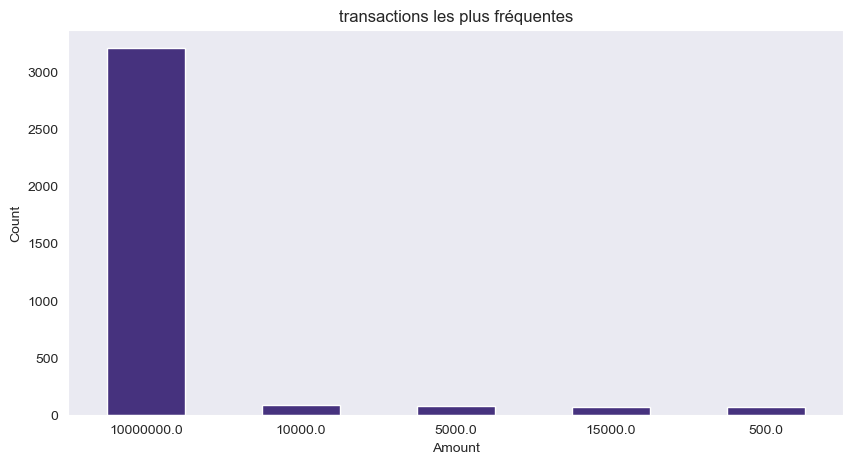

In [20]:
# Transactions les plus frequentes 
sns.set_style("dark") # set the style of the plot as dark grid
sns.set_palette("viridis")
plt.figure(figsize = (10,5))
df['amount'].value_counts().sort_values(ascending = False).head().plot(kind = 'bar')
plt.title("transactions les plus fréquentes")
plt.xticks(rotation = 0)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

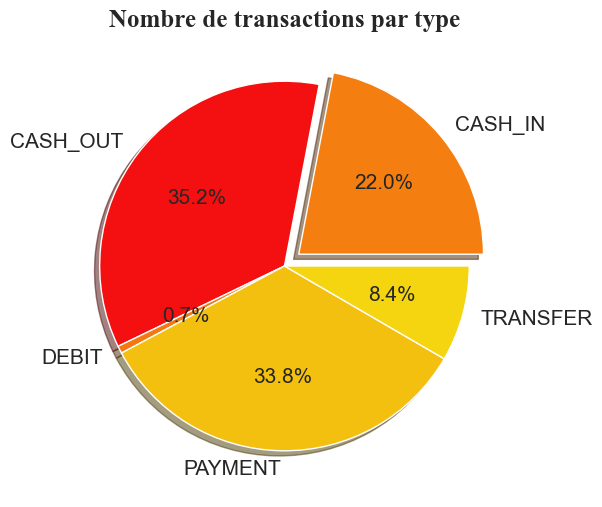

In [21]:
# Graphique en camambert 
df.groupby('type').count()['amount']
counts = df.groupby('type').count()['amount']
plt.figure(figsize = (6,6))
plt.pie(counts, labels = counts.index, autopct = "%1.1f%%", colors=['#F47F10', '#F41010', '#F47810', '#F4C010','#F4D510'], shadow = True,explode = (0.1, 0, 0, 0, 0),textprops={'fontsize': 15})
plt.title('Nombre de transactions par type', fontweight = 'bold', fontsize = 18, fontfamily = 'times new roman')
plt.show()

In [22]:
# On regroupe les transactions par type de transaction et si elles sont frauduleuses ou non
# Puis on compte le nombre de transactions dans chaque groupe
df.groupby(['type','isFraud']).count()

step   amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
type     isFraud                                                              
CASH_IN  0        1399284  1399284   1399284        1399284         1399284   
CASH_OUT 0        2233384  2233384   2233384        2233384         2233384   
         1           4116     4116      4116           4116            4116   
DEBIT    0          41432    41432     41432          41432           41432   
PAYMENT  0        2151495  2151495   2151495        2151495         2151495   
TRANSFER 0         528812   528812    528812         528812          528812   
         1           4097     4097      4097           4097            4097   

                  nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  
type     isFraud                                                            
CASH_IN  0         1399284         1399284         1399284         1399284  
CASH_OUT 0         2233384         2233384         2233384         2233384  
         1            4116            4116            4116            4116  
DEBIT    0           41432           41432           41432           41432  
PAYMENT  0         2151495         2151495         2151495         2151495  
TRANSFER 0          528812          528812          528812          528812  
         1            4097            4097            4097            4097

In [23]:
# Sélectionner les colonnes qui contiennent des données numériques (entiers et flottants)
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Extraire les données numériques du DataFrame
numeric_data = df[numeric_columns]

# Calculer la matrice de corrélation de Pearson entre les colonnes numériques
correlation = numeric_data.corr()


In [25]:
df.groupby(['isFraud']).count()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,,,,
0,6354407,6354407,6354407,6354407,6354407,6354407,6354407,6354407,6354407,6354407
1,8213,8213,8213,8213,8213,8213,8213,8213,8213,8213


isFraud
0    6354407
1       8213
Name: count, dtype: int64
isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


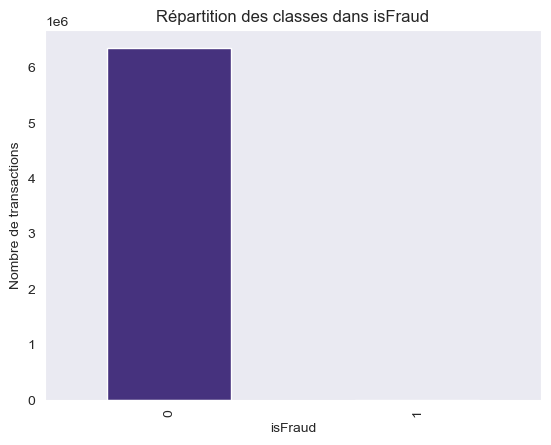

In [26]:
# Vérification de l'équilibre des classes dans la colonne 'isFraud'
fraud_counts = df['isFraud'].value_counts()
print(fraud_counts)

# Calcul des pourcentages de chaque classe
fraud_percentages = df['isFraud'].value_counts(normalize=True) * 100
print(fraud_percentages)

# Visualisation de la répartition des classes
import matplotlib.pyplot as plt

fraud_counts.plot(kind='bar')
plt.title('Répartition des classes dans isFraud')
plt.xlabel('isFraud')
plt.ylabel('Nombre de transactions')
plt.show()


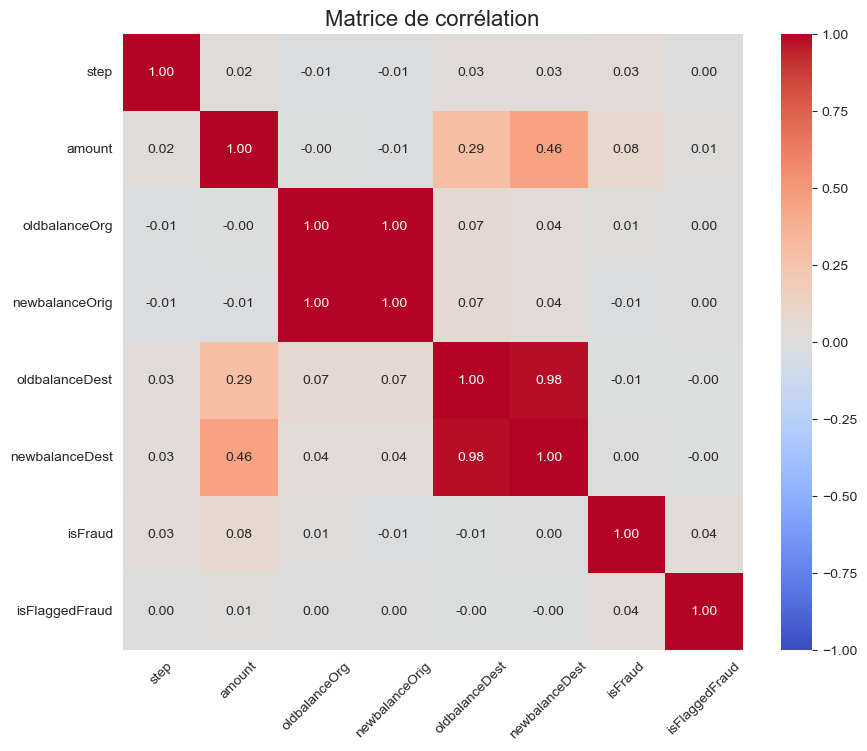

In [27]:
# Visualisation de la matrice de corrélation 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation,vmin = -1, vmax = 1,cmap = "coolwarm",annot = True, fmt = '.2f')
plt.title('Matrice de corrélation', fontsize=16)
plt.xticks(rotation = 45)
plt.show()

In [28]:
# On supprime les colonnes qui ne sont pas utiles pour notre modélisation
df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'], axis=1, inplace=True)

In [29]:
# On supprime aussi les colonnes 'nameOrig' et 'nameDest' car elles ne sont pas nécessaires pour la modélisation
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [30]:
df.head()

,step,type,amount,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,0,0
1,1,PAYMENT,1864.28,0,0
2,1,TRANSFER,181.00,1,0
3,1,CASH_OUT,181.00,1,0
4,1,PAYMENT,11668.14,0,0


In [31]:
# On transforme les valeurs catégorielles de la colonne 'type' en valeurs numériques pour que le modèle puisse les comprendre
le = LabelEncoder()  # Créer l'encodeur
df['type'] = le.fit_transform(df['type'])  # Transformer et remplacer les valeurs de 'type' par des nombres

In [32]:
# On sépare les données en deux parties : 
# X contient les variables de caractéristiques (tout sauf 'isFraud')
# y contient la variable cible ('isFraud', si la transaction est une fraude ou non)
X = df.drop('isFraud', axis=1)  # Toutes les colonnes sauf 'isFraud'
y = df['isFraud']  # La colonne 'isFraud' (notre cible)

In [33]:
# On standardise les données pour que toutes les variables aient une échelle similaire
# Cela permet d'éviter qu'une variable avec une grande échelle n'impacte trop le modèle
sc = StandardScaler()  # Créer l'objet de standardisation
X = sc.fit_transform(X)  # Appliquer la standardisation sur X

In [34]:
# On sépare les données en deux ensembles : 
# 80% pour entraîner le modèle et 20% pour tester sa performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Création et entraînement du modèle de Régression logistique

In [35]:
# On crée un modèle de régression logistique
# Puis, on entraîne ce modèle avec les données d'entraînement
lr = LogisticRegression(class_weight='balanced',random_state=42)  # Créer l'objet régression logistique
lr.fit(X_train, y_train)    # Entraîner le modèle avec les données d'entraînement

LogisticRegression(class_weight='balanced', random_state=42)

Tester le modèle 

In [36]:
# On teste le modèle sur les données de test et on fait les prédictions
y_pred = lr.predict(X_test)

# On calcule plusieurs mesures de performance pour évaluer le modèle
accuracy_lr = accuracy_score(y_test, y_pred)  # Précision du modèle
precision_lr = precision_score(y_test, y_pred)  # Précision pour les fraudes
recall_lr = recall_score(y_test, y_pred)  # Rappel pour les fraudes
classification_lr = classification_report(y_test, y_pred)  # Rapport complet sur les performances

# On affiche les résultats
print(f"Accuracy of logistic regression {accuracy_lr}")
print(f"Precision of logistic regression {precision_lr}")
print(f"Recall of logistic regression {recall_lr}")
print(f"Classification Report of logistic regression\n {classification_lr}")

Accuracy of logistic regression 0.8927244856154645
Precision of logistic regression 0.008201064631389612
Recall of logistic regression 0.6928131416837783
Classification Report of logistic regression
               precision    recall  f1-score   support

           0       1.00      0.89      0.94   1906351
           1       0.01      0.69      0.02      2435

    accuracy                           0.89   1908786
   macro avg       0.50      0.79      0.48   1908786
weighted avg       1.00      0.89      0.94   1908786



Gradient Boosting avec XGBoost

In [37]:
%pip install XGBoost

In [38]:
ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

In [39]:
# Importation de la bibliothèque Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Division des données en ensembles d'entraînement (X_train, y_train) et de test (X_test, y_test)
# On suppose que ces ensembles sont déjà définis auparavant dans le code.

# Calcul du poids de la classe positive (utile pour des classes déséquilibrées)
scale_pos_weight = len(y_train) / sum(y_train)

# Initialisation du classifieur XGBoost avec des paramètres personnalisés
xgb = XGBClassifier(
    max_depth=6,               # Profondeur maximale des arbres. Plus le nombre est grand, plus l'arbre est complexe.
    learning_rate=0.1,         # Taux d'apprentissage : définit la vitesse d'ajustement des poids à chaque étape.
    n_estimators=100,          # Nombre de "boosting rounds" : nombre d'arbres que XGBoost va construire.
    scale_pos_weight=ratio,        # Sert à ajuster le modèle pour les jeux de données déséquilibrés. 
                               # Si 'y_train' contient beaucoup plus de 0 que de 1, on peut augmenter ce poids.
    eval_metric='logloss',     # Métrique utilisée pour évaluer la performance du modèle pendant l'entraînement.
    use_label_encoder=False    # Permet de désactiver l'avertissement sur l'encodage des labels.
)

# Entraînement du modèle avec les données d'entraînement
xgb.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred_xgb = xgb.predict(X_test)



c:\Users\ounad\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:34:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [40]:
# Importation des bibliothèques nécessaires pour l'évaluation du modèle
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Calcul de la précision globale (accuracy) du modèle
accuracy_gb_og = accuracy_score(y_test, y_pred_xgb)  # Mesure de la proportion des prédictions correctes

# Calcul de la précision pour les prédictions positives (fraudes)
precision_gb_og = precision_score(y_test, y_pred_xgb)  # Mesure de la proportion des fraudes prédites correctes

# Calcul du rappel (recall) : combien de fraudes réelles ont été détectées par le modèle
recall_gb_og = recall_score(y_test, y_pred_xgb)  # Mesure de la capacité du modèle à trouver toutes les fraudes réelles

# Affichage des résultats d'évaluation du modèle
print("Résultats du modèle XGBoost :")
print(f"Précision globale (Accuracy) : {accuracy_gb_og}")  # Affichage de la précision globale
print(f"Précision des prédictions positives : {precision_gb_og}")  # Affichage de la précision
print(f"Rappel des fraudes détectées : {recall_gb_og}")  # Affichage du rappel

# Affichage de la matrice de confusion pour voir les erreurs du modèle
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_xgb))  # Affichage des faux positifs et faux négatifs

# Affichage du rapport de classification qui donne plusieurs métriques de performance
print("Rapport de classification :")
print(classification_report(y_test, y_pred_xgb))  # Résumé des résultats du modèle

Résultats du modèle XGBoost :
Précision globale (Accuracy) : 0.9067030038988132
Précision des prédictions positives : 0.01201833587998333
Rappel des fraudes détectées : 0.8882956878850102
Matrice de confusion :
[[1728539  177812]
 [    272    2163]]
Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      0.91      0.95   1906351
           1       0.01      0.89      0.02      2435

    accuracy                           0.91   1908786
   macro avg       0.51      0.90      0.49   1908786
weighted avg       1.00      0.91      0.95   1908786



In [41]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [42]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report

# Balanced Random Forest
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = brf.predict(X_test)
print("Classification Report (Balanced Random Forest):")
print(classification_report(y_test, y_pred))


c:\Users\ounad\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\ounad\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\ounad\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Classification Report (Balanced Random Forest):
              precision    recall  f1-score   support

           0       1.00      0.89      0.94   1906351
           1       0.01      0.90      0.02      2435

    accuracy                           0.89   1908786
   macro avg       0.51      0.89      0.48   1908786
weighted avg       1.00      0.89      0.94   1908786



In [43]:
from imblearn.ensemble import EasyEnsembleClassifier

# Easy Ensemble Classifier
easy_ensemble = EasyEnsembleClassifier(random_state=42)
easy_ensemble.fit(X_train, y_train)

# Predictions and evaluation
y_pred = easy_ensemble.predict(X_test)
print("Classification Report (Easy Ensemble Classifier):")
print(classification_report(y_test, y_pred))


Classification Report (Easy Ensemble Classifier):
              precision    recall  f1-score   support

           0       1.00      0.88      0.94   1906351
           1       0.01      0.87      0.02      2435

    accuracy                           0.88   1908786
   macro avg       0.50      0.87      0.48   1908786
weighted avg       1.00      0.88      0.94   1908786



Hyperparameter tuning

In [44]:
# On commence par importer la fonction GridSearchCV de scikit-learn qui nous aide à trouver les meilleurs paramètres pour notre modèle
from sklearn.model_selection import GridSearchCV

# Définition des hyperparamètres à tester : 
# - max_depth : profondeur maximale des arbres, on essaie 6 et 8
# - learning_rate : taux d'apprentissage, on teste 0.05 et 0.1
# - n_estimators : nombre d'arbres utilisés, on essaie 50 et 100
# - scale_pos_weight : poids à accorder à la classe minoritaire, on teste 1
param_grid = {
    'max_depth': [6, 8],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [50, 100],
    'scale_pos_weight': [1]
}

# On crée un objet GridSearchCV en lui passant :
# - le modèle xgb que l'on veut optimiser
# - la grille des paramètres à tester
# - l'évaluation de la performance basée sur le recall (rappel) 
# - cv=5 pour utiliser la validation croisée avec 5 sous-ensembles de données
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='recall', cv=5)

# On entraîne le modèle en cherchant les meilleurs paramètres grâce à GridSearchCV
grid_search.fit(X_train, y_train)

# Une fois l'entraînement terminé, on récupère le modèle avec les meilleurs paramètres trouvés
xgb_best = grid_search.best_estimator_

# On fait des prédictions avec ce modèle optimisé sur les données de test
y_pred_xgb_best = xgb_best.predict(X_test)


c:\Users\ounad\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:51:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ounad\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:51:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ounad\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:51:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ounad\anaconda3\Lib\site-packages\

In [45]:
# On récupère les meilleurs paramètres trouvés par GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# On affiche ces meilleurs paramètres et le score de rappel (recall) obtenu avec ces paramètres
print(f"Meilleurs paramètres : {best_params}")
print(f"Meilleur score de rappel trouvé : {best_score}")

# On récupère le modèle qui a été entraîné avec ces meilleurs paramètres
xgb_best = grid_search.best_estimator_

# On teste ce modèle sur les données de test pour voir comment il se comporte
y_pred_xgb_best = xgb_best.predict(X_test)

# On calcule l'exactitude (accuracy), la précision (precision) et le rappel (recall) du modèle optimisé
accuracy_gb = accuracy_score(y_test, y_pred_xgb_best)
precision_gb = precision_score(y_test, y_pred_xgb_best)
recall_gb = recall_score(y_test, y_pred_xgb_best)

# On affiche les résultats de l'évaluation du modèle optimisé
print(f"Exactitude : {accuracy_gb}")
print(f"Précision : {precision_gb}")
print(f"Rappel : {recall_gb}")


Meilleurs paramètres : {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100, 'scale_pos_weight': 1}
Meilleur score de rappel trouvé : 0.19037672823139953
Exactitude : 0.9989275906256647
Précision : 0.8959183673469387
Rappel : 0.18028747433264888


RandomizedSearch insetad of grid

In [48]:
# Importer la méthode de recherche aléatoire des meilleurs paramètres
from sklearn.model_selection import RandomizedSearchCV

# Définir une liste de paramètres à tester
param_dist = {
    'max_depth': [6, 8, 10],  # Profondeur maximale des arbres de décision
    'learning_rate': [0.01, 0.05, 0.1],  # Taux d'apprentissage, influence sur la vitesse d'apprentissage du modèle
    'n_estimators': [50, 100, 200],  # Nombre d'arbres de décision dans le modèle
    'scale_pos_weight': [1, scale_pos_weight]  # Ajuster l'importance des classes (utilisé pour des données déséquilibrées)
}

# Créer l'objet RandomizedSearchCV pour chercher les meilleurs paramètres
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=10, scoring='recall', cv=5)

# Entraîner le modèle avec la recherche aléatoire des meilleurs paramètres
random_search.fit(X_train, y_train)

# Obtenir le meilleur modèle après la recherche
xgb_best_random = random_search.best_estimator_

# Évaluer le modèle trouvé sur les données de test
y_pred_xgb_best_random = xgb_best_random.predict(X_test)


c:\Users\ounad\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:09:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ounad\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:10:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ounad\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:10:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ounad\anaconda3\Lib\site-packages\

In [49]:
# Obtenir les meilleurs hyperparamètres et le meilleur score
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

# Afficher les meilleurs hyperparamètres et le meilleur score de rappel
print(f"Best hyperparameters: {best_params_random}")
print(f"Best recall score from random search: {best_score_random}")


# Obtenir le meilleur modèle de la recherche aléatoire
xgb_best_random = random_search.best_estimator_

# Évaluer le meilleur modèle sur l'ensemble de test
y_pred_xgb_best_random = xgb_best_random.predict(X_test)

# Calculer l'exactitude, la précision et le rappel pour le meilleur modèle
accuracy_random = accuracy_score(y_test, y_pred_xgb_best_random)
precision_random = precision_score(y_test, y_pred_xgb_best_random)
recall_random = recall_score(y_test, y_pred_xgb_best_random)

# Afficher les résultats d'évaluation pour le meilleur modèle
print(f"Accuracy: {accuracy_random}")
print(f"Precision: {precision_random}")
print(f"Recall: {recall_random}")

Best hyperparameters: {'scale_pos_weight': 770.8262374524056, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1}
Best recall score from random search: 0.8883663625878159
Accuracy: 0.9084763823707843
Precision: 0.012270807143908765
Recall: 0.8899383983572895


In [50]:
# comparaison des méthodes
performance_df = pd.DataFrame({
    'models' : ['Normal', 'Tuning- Grid', 'Tuning- Random'],
    'accuracy' : [accuracy_gb_og, accuracy_gb, accuracy_random],
    'precision' : [precision_gb_og, precision_gb, precision_random],
    'recall' : [recall_gb_og, recall_gb, recall_random]
})
performance_df

,models,accuracy,precision,recall
0,Normal,0.906703,0.012018,0.888296
1,Tuning- Grid,0.998928,0.895918,0.180287
2,Tuning- Random,0.908476,0.012271,0.889938


Arbre de décision

In [51]:
# Créer un objet pour un arbre de décision
sv = DecisionTreeClassifier(max_depth=20)

# Ajuster les données d'entraînement sur le modèle d'arbre de décision
sv.fit(X_train, y_train)

# Tester le modèle sur les données de test
y_pred = sv.predict(X_test)

# Calculer les métriques de performance

# Exactitude (accuracy) de l'arbre de décision
accuracy_sv = accuracy_score(y_test, y_pred)

# Précision (precision) de l'arbre de décision
precision_sv = precision_score(y_test, y_pred)

# Rappel (recall) de l'arbre de décision
recall_sv = recall_score(y_test, y_pred)

# Rapport de classification (classification report)
classification_sv = classification_report(y_test, y_pred)

# Afficher les métriques de performance
print(f"Exactitude de l'arbre de décision : {accuracy_sv}")
print(f"Précision de l'arbre de décision : {precision_sv}")
print(f"Rappel de l'arbre de décision : {recall_sv}")
print(f"Rapport de classification de l'arbre de décision :\n {classification_sv}")


Exactitude de l'arbre de décision : 0.9989794560521714
Précision de l'arbre de décision : 0.6655336505778382
Rappel de l'arbre de décision : 0.4020533880903491
Rapport de classification de l'arbre de décision :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.67      0.40      0.50      2435

    accuracy                           1.00   1908786
   macro avg       0.83      0.70      0.75   1908786
weighted avg       1.00      1.00      1.00   1908786



Comparing the model

In [52]:
performance_df = pd.DataFrame({
    'models' : ['Linear Regression', 'Gradient Boosting', 'Decision Tree'],
    'accuracy' : [accuracy_lr, accuracy_gb, accuracy_sv],
    'precision' : [precision_lr, precision_gb, precision_sv],
    'recall' : [recall_lr, recall_gb, recall_sv]
})
performance_df

,models,accuracy,precision,recall
0,Linear Regression,0.892724,0.008201,0.692813
1,Gradient Boosting,0.998928,0.895918,0.180287
2,Decision Tree,0.998979,0.665534,0.402053


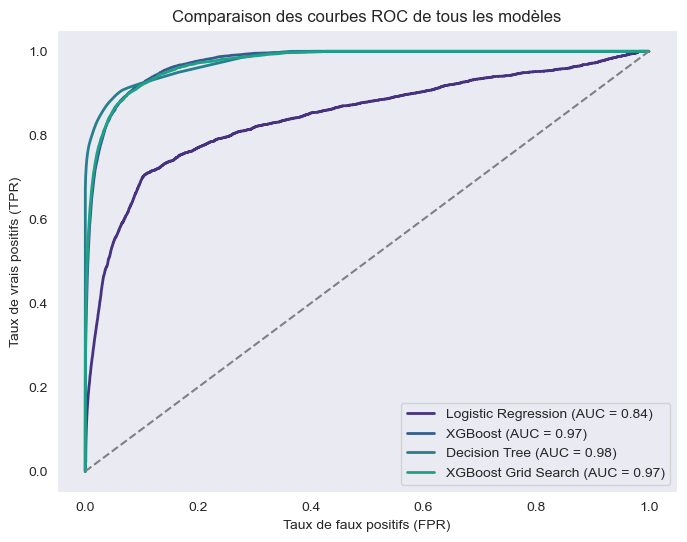

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix
import numpy as np


# 2. 📈 COURBES ROC DE TOUS LES MODÈLES
models = {
    "Logistic Regression": lr,
    "XGBoost": xgb,
    "Decision Tree": sv,
    "XGBoost Grid Search": xgb_best
}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):  # Vérifier si le modèle a predict_proba
        y_pred_proba = model.predict_proba(X_train)[:, 1]  
    else:  # Certains modèles comme SVM peuvent utiliser decision_function()
        y_pred_proba = model.decision_function(X_train)
    
    fpr, tpr, _ = roc_curve(y_train, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Ligne de hasard
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Comparaison des courbes ROC de tous les modèles')
plt.legend()
plt.show()



In [73]:
print(f"Taille de y_test : {len(y_test)}")
print(f"Taille de y_pred : {len(y_pred)}")



Taille de y_test : 1908786
Taille de y_pred : 4453834


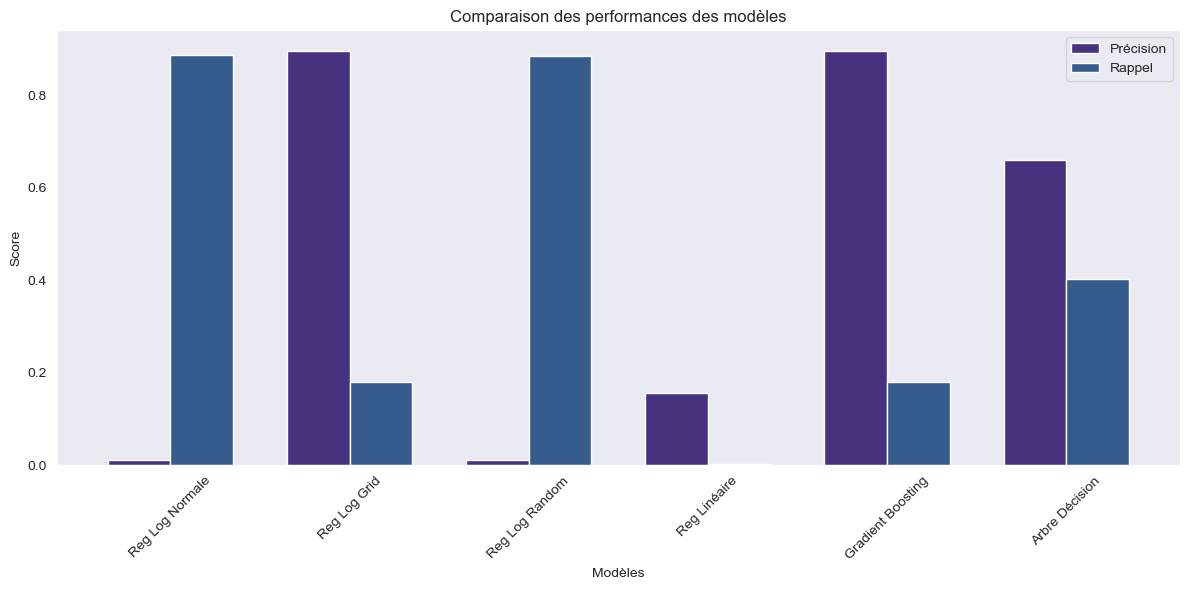

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# Création d'un DataFrame avec les résultats
results = pd.DataFrame({
    'Modèle': ['Reg Log Normale', 'Reg Log Grid', 'Reg Log Random', 
               'Reg Linéaire', 'Gradient Boosting', 'Arbre Décision'],
    'Précision': [0.012018, 0.895918, 0.010465, 0.155556, 0.895918, 0.660148],
    'Rappel': [0.888296, 0.180287, 0.884189, 0.002875, 0.180287, 0.402053]
})

# Configuration du graphique
plt.figure(figsize=(12, 6))

# Graphique en barres groupées
bar_width = 0.35
index = range(len(results))

plt.bar(index, results['Précision'], bar_width, label='Précision')
plt.bar([i + bar_width for i in index], results['Rappel'], bar_width, label='Rappel')

plt.title('Comparaison des performances des modèles')
plt.xlabel('Modèles')
plt.ylabel('Score')
plt.xticks([i + bar_width/2 for i in index], results['Modèle'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
from scipy import stats
import numpy as np

# Exemple avec les scores de précision (à adapter avec vos données réelles)
precision_gb = np.random.normal(0.895, 0.02, 100)  # Données simulées
precision_tree = np.random.normal(0.660, 0.03, 100)  # Données simulées

t_stat, p_value = stats.ttest_ind(precision_gb, precision_tree)

print(f"Résultats du test t entre Gradient Boosting et Arbre de Décision :")
print(f"Statistique t : {t_stat:.3f}")
print(f"Valeur p : {p_value:.5f}")


Résultats du test t entre Gradient Boosting et Arbre de Décision :
Statistique t : 62.328
Valeur p : 0.00000


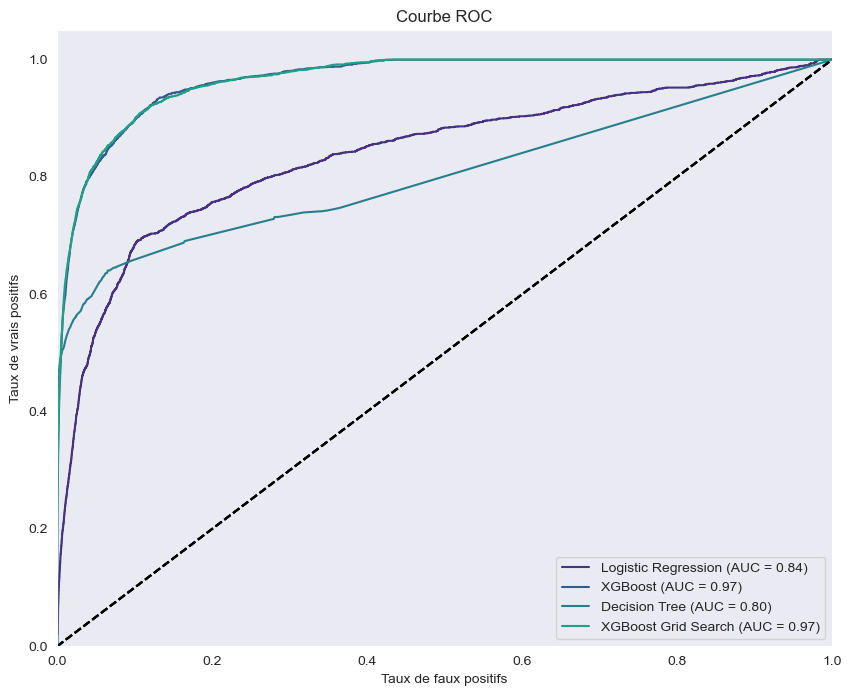

In [80]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fonction pour tracer la courbe ROC
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title('Courbe ROC')
    plt.legend(loc="lower right")

# Tracer les courbes ROC pour chaque modèle
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    plot_roc_curve(y_test, y_pred_proba, model_name)

plt.show()


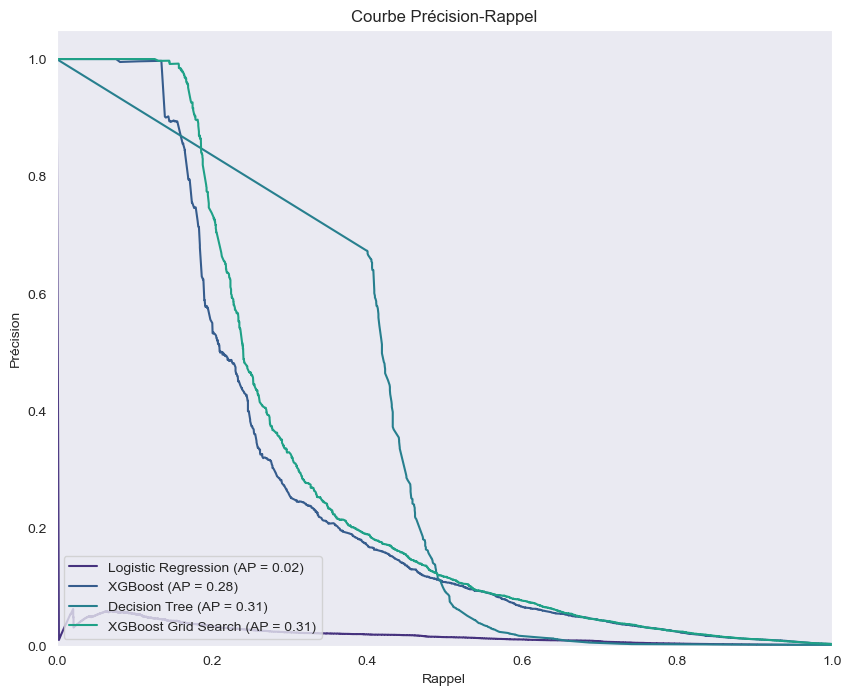

In [81]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

def plot_precision_recall_curve(y_true, y_pred_proba, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    avg_precision = average_precision_score(y_true, y_pred_proba)
    
    plt.plot(recall, precision, label=f'{model_name} (AP = {avg_precision:.2f})')
    plt.xlabel('Rappel')
    plt.ylabel('Précision')
    plt.title('Courbe Précision-Rappel')
    plt.legend(loc="lower left")

plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    plot_precision_recall_curve(y_test, y_pred_proba, model_name)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()
